In [1]:
import pandas as pd
snadf = pd.read_excel('/content/Social_Network_Ads.xlsx')

In [2]:
snadf.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
print('Different attributes provided in the dataset to find whether people purchase the items by seeing social network ads are...')
print(snadf.columns.values)

Different attributes provided in the dataset to find whether people purchase the items by seeing social network ads are...
['User ID ' 'Gender ' 'Age ' 'EstimatedSalary ' 'Purchased']


In [4]:
# Here, Outcome value 0 means not purchased and 1 means purchased
# Class distribution
snadf.groupby(snadf.columns[-1]).size()

Purchased
0    257
1    143
dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


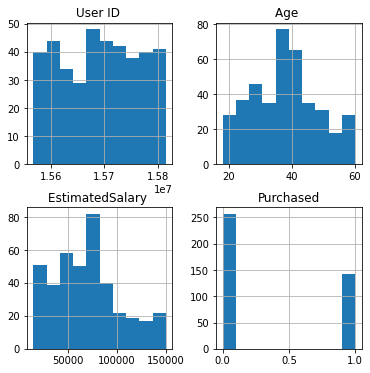

In [5]:
# Data distribution
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (6,6))
ax = fig.gca()
snadf.hist(ax = ax)

plt.show()

OUTCOME - 0 (is 1st subplot) & OUTCOME - 1 (is 2nd subplot)


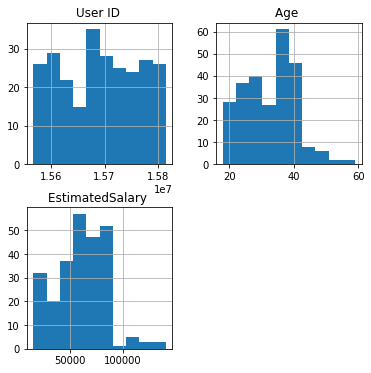

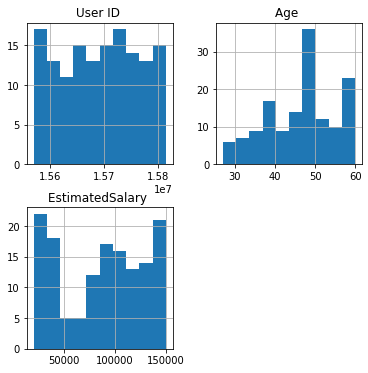

In [6]:
snadf.groupby(snadf.columns[-1]).hist(figsize = (6,6))
print('OUTCOME - 0 (is 1st subplot) & OUTCOME - 1 (is 2nd subplot)')

plt.show()

In [7]:
# Finding whether any missing values are present in the data
snadf.isna().sum()

User ID             0
Gender              0
Age                 0
EstimatedSalary     0
Purchased           0
dtype: int64

In [8]:
# Finding whether any null values are present in the data
snadf.isnull().sum()

User ID             0
Gender              0
Age                 0
EstimatedSalary     0
Purchased           0
dtype: int64

In [9]:
# For social network ads dataset, possible outliers would be attributes value equals to zero. 
# So we would check whether attribute values are zero.

for i in range(2, len(snadf.columns) - 1):
  if(len(snadf.columns[i]) > 12):
    print('Total no. of rows having 0 in ',snadf.columns[i],'is',snadf[snadf[snadf.columns[i]] == 0].shape[0])
  elif(len(snadf.columns[i]) > 5):
    print('Total no. of rows having 0 in ',snadf.columns[i],'is\t  ',snadf[snadf[snadf.columns[i]] == 0].shape[0])
  else:
    print('Total no. of rows having 0 in ',snadf.columns[i],'is\t\t  ',snadf[snadf[snadf.columns[i]] == 0].shape[0])

Total no. of rows having 0 in  Age  is		   0
Total no. of rows having 0 in  EstimatedSalary  is 0


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
snadf[snadf.columns[1]] = le.fit_transform(snadf[snadf.columns[1]])
print(snadf.columns[1])
snadf.head()

Gender 


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [11]:
# Since no attributes have value 0, so there are no outliers in our data.

X = snadf.iloc[:,[2,3]].values
y = snadf.iloc[:,-1].values.reshape(-1,1)

In [12]:
# Split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [13]:
# Model selection

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [14]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))

In [15]:
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")


names = []
scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name  Score
0  KNN   0.83
1   LR   0.68
2   DT   0.90
3  GNB   0.90
4   RF   0.92


In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

strat_k_fold = StratifiedKFold(n_splits=10, random_state=0)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name   Score
0  KNN  0.7850
1   LR  0.6425
2   DT  0.8350
3  GNB  0.8775
4   RF  0.8825


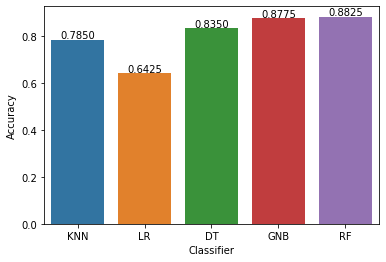

In [17]:
import seaborn as sns

axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [18]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
yp = (np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n(',cm[0][0],'\t',cm[0][1],' )\n(',cm[1][0],'\t',cm[1][1],')')

Confusion matrix
( 63 	 5  )
( 4 	 28 )


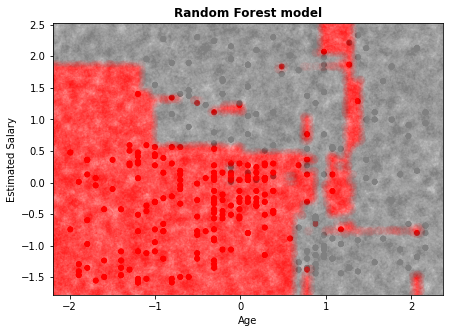

In [20]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(7,5))
rng = np.random.RandomState(0)
Xnew = [-2.5, -2.5] + [5.5, 5.5] * rng.rand(100000, 2)
ynew = rfc.predict(Xnew)
y_train = y_train.reshape(-1,1)
plt.scatter(X_train[:, 0], X_train[:, 1], c= y_train[:,0], s=25, cmap = ListedColormap(('red', 'grey')))
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=60, cmap = ListedColormap(('red', 'grey')), alpha=0.025)
plt.axis(lim)
plt.title('Random Forest model',fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

plt.show()


In [21]:
class RandomForest():
    def __init__(self, x, y, n_trees, n_features, sample_sz, depth=10, min_leaf=5):
        np.random.seed(12)
        if n_features == 'sqrt':
            self.n_features = int(np.sqrt(x.shape[1]))
        elif n_features == 'log2':
            self.n_features = int(np.log2(x.shape[1]))
        else:
            self.n_features = n_features
        self.x, self.y, self.sample_sz, self.depth, self.min_leaf  = x, y, sample_sz, depth, min_leaf
        self.trees = [self.create_tree() for i in range(n_trees)]

    def create_tree(self):
        idxs = np.random.permutation(len(self.y))[:self.sample_sz]
        f_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
        return DecisionTree(self.x[idxs], self.y[idxs], self.n_features, f_idxs,
                    idxs=np.array(range(self.sample_sz)),depth = self.depth, min_leaf=self.min_leaf)
        
    def predict(self, x):
        return np.mean([t.predict(x) for t in self.trees], axis=0)

def std_agg(cnt, s1, s2): return math.sqrt((s2/cnt) - (s1/cnt)**2)

class DecisionTree():
    def __init__(self, x, y, n_features, f_idxs,idxs,depth=10, min_leaf=5):
        self.x, self.y, self.idxs, self.min_leaf, self.f_idxs = x, y, idxs, min_leaf, f_idxs
        self.depth = depth
        self.n_features = n_features
        self.n, self.c = len(idxs), x.shape[1]
        self.val = np.mean(y[idxs])
        self.score = float('inf')
        self.find_varsplit()
        
    def find_varsplit(self):
        for i in self.f_idxs: self.find_better_split(i)
        if self.is_leaf: return
        x = self.split_col
        lhs = np.nonzero(x<=self.split)[0]
        rhs = np.nonzero(x>self.split)[0]
        lf_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
        rf_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
        self.lhs = DecisionTree(self.x, self.y, self.n_features, lf_idxs, self.idxs[lhs], depth=self.depth-1, min_leaf=self.min_leaf)
        self.rhs = DecisionTree(self.x, self.y, self.n_features, rf_idxs, self.idxs[rhs], depth=self.depth-1, min_leaf=self.min_leaf)

    def find_better_split(self, var_idx):
        x, y = self.x[self.idxs,var_idx], self.y[self.idxs]
        sort_idx = np.argsort(x)
        sort_y,sort_x = y[sort_idx], x[sort_idx]
        rhs_cnt,rhs_sum,rhs_sum2 = self.n, sort_y.sum(), (sort_y**2).sum()
        lhs_cnt,lhs_sum,lhs_sum2 = 0,0.,0.

        for i in range(0,self.n-self.min_leaf-1):
            xi,yi = sort_x[i],sort_y[i]
            lhs_cnt += 1; rhs_cnt -= 1
            lhs_sum += yi; rhs_sum -= yi
            lhs_sum2 += yi**2; rhs_sum2 -= yi**2
            if i<self.min_leaf or xi==sort_x[i+1]:
                continue

            lhs_std = std_agg(lhs_cnt, lhs_sum, lhs_sum2)
            rhs_std = std_agg(rhs_cnt, rhs_sum, rhs_sum2)
            curr_score = lhs_std*lhs_cnt + rhs_std*rhs_cnt
            if curr_score<self.score: 
                self.var_idx,self.score,self.split = var_idx,curr_score,xi

    @property
    def split_name(self): return self.x.columns[self.var_idx]
    
    @property
    def split_col(self): return self.x[self.idxs,self.var_idx]

    @property
    def is_leaf(self): return self.score == float('inf') or self.depth <= 0 
    

    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.is_leaf: return self.val
        t = self.lhs if xi[self.var_idx]<=self.split else self.rhs
        return t.predict_row(xi)

In [22]:
import math

rfcs = RandomForest(X_train, y_train, n_trees=500, n_features='log2', sample_sz=300, depth=20, min_leaf=1)

y_preds = rfcs.predict(X_test)

RF_acc = sum(y_preds == y_test)/len(y_test)
RF_acc = np.round(RF_acc[RF_acc != 0],3)

print("Testing accuracy: %.3f" %max(RF_acc))

Testing accuracy: 0.680


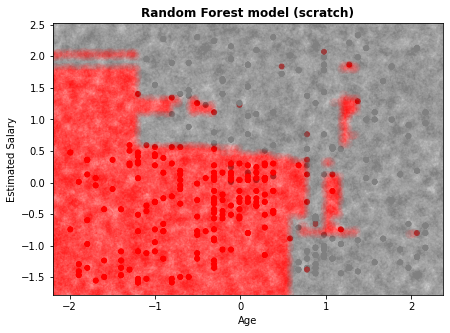

In [23]:
from matplotlib.colors import ListedColormap


plt.figure(figsize=(7,5))
rng = np.random.RandomState(0)
Xnew = [-2.5, -2.5] + [5.5, 5.5] * rng.rand(100000, 2)
ynew = rfcs.predict(Xnew)
y_train = y_train.reshape(-1,1)


plt.scatter(X_train[:, 0], X_train[:, 1], c= y_train[:,0], s=25, cmap = ListedColormap(('red', 'grey')))
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=60, cmap = ListedColormap(('red', 'grey')), alpha=0.025)
plt.axis(lim)
plt.title('Random Forest model (scratch)',fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
# print(‘\n’)
plt.show()
